### Logostic Regression using Perceptron

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

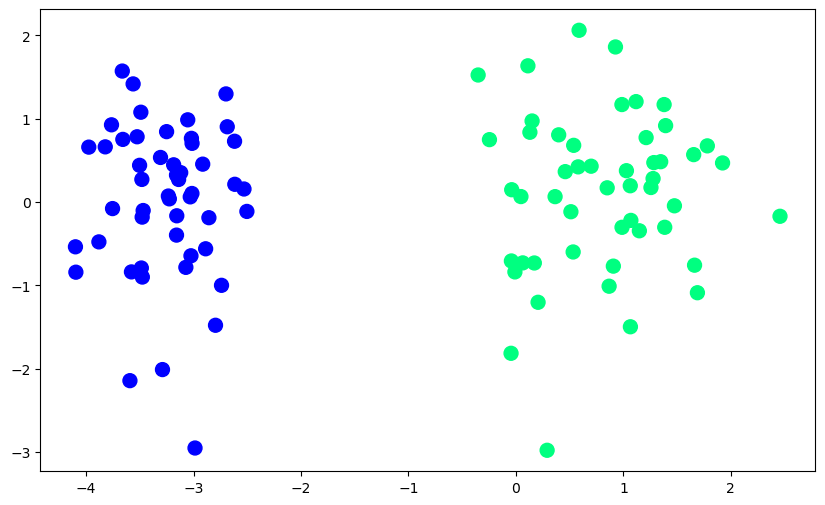

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
def step(z):
    return 1 if z > 0 else 0

In [4]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1])  # Initialize weights to 1
    lr = 0.01
    for _ in range(1000):
        j = np.random.randint(0, X.shape[0])  # Randomly select an example
        y_pred = step(np.dot(X[j], weights)) # Predict
        weights += lr * (y[j] - y_pred) * X[j]
    return weights[0], weights[1:]


In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(f"Intercept: {intercept_}, Coefficients: {coef_}")

Intercept: 1.1700000000000002, Coefficients: [1.01573065 0.60967136]


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

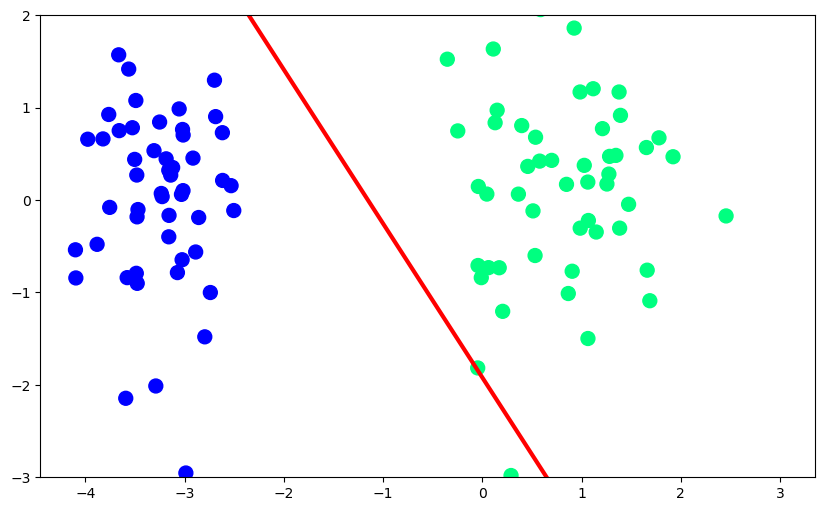

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Using Sigmoid Function

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def perceptron(X, y, learning_rate=0.01, n_iterations=1000):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1]) # Initialize weights to 1

    for _ in range(n_iterations):
        j = np.random.randint(0, X.shape[0])
        y_pred = sigmoid(np.dot(X[j], weights))  # Predict using sigmoid
        weights += learning_rate * (y[j] - y_pred) * X[j]  # Update weights
    # Return the bias term and the coefficients
    return weights[0], weights[1:]

In [12]:
intercept_,coef_ = perceptron(X,y)

In [13]:
print(f"Intercept: {intercept_}, Coefficients: {coef_}")

Intercept: 1.4194988658810934, Coefficients: [1.80345277 0.50185376]


In [14]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

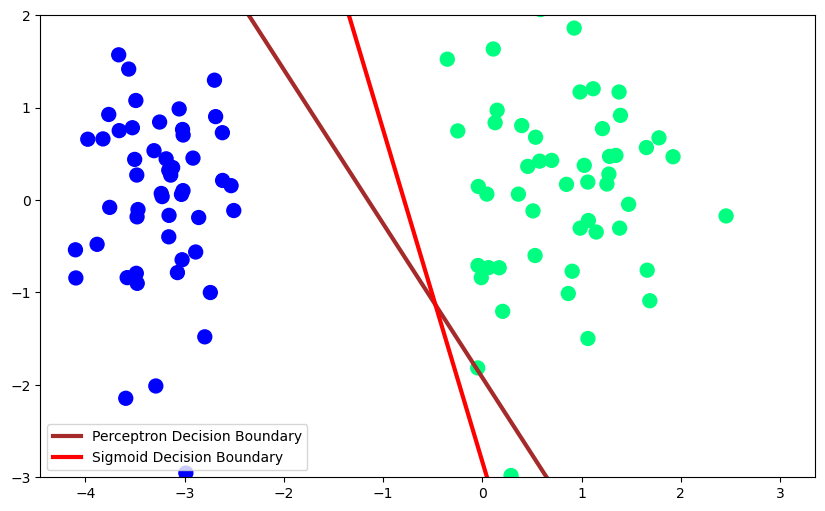

In [15]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='brown', linewidth=3, label='Perceptron Decision Boundary')
plt.plot(x_input2, y_input2, color='red', linewidth=3, label='Sigmoid Decision Boundary')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.legend()

### Using Gradient Descent

In [60]:
def Logistic_Regression(X, y, learning_rate=0.6, n_iterations=5000):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights = np.ones(X.shape[1])  # Initialize weights to 1

    for _ in range(n_iterations):
        y_pred = sigmoid(np.dot(X, weights))  # Predict using sigmoid
        weights += learning_rate * (np.dot(X.T, (y - y_pred)) / X.shape[0])  # Update weights
    return weights[0], weights[1:]

In [61]:
intercept_, coef_ = Logistic_Regression(X, y)

In [62]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

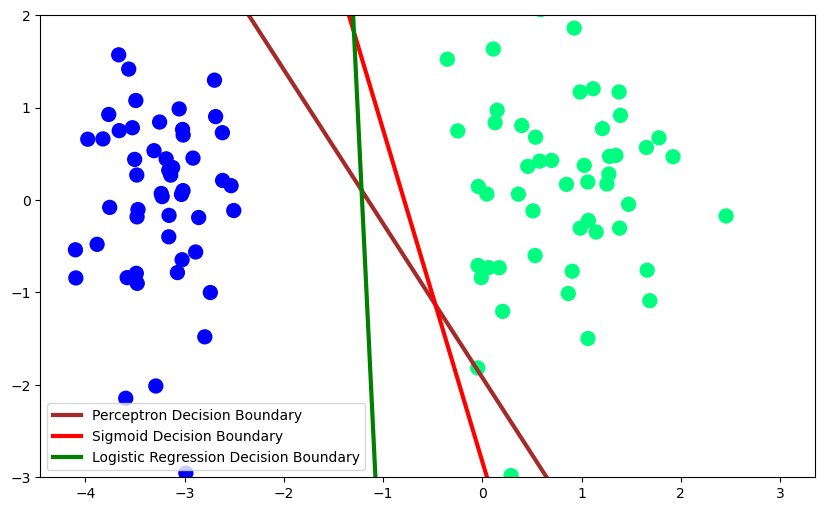

In [63]:
x_input3 = np.linspace(-3, 3, 100)
y_input3 = m * x_input3 + b
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='brown', linewidth=3, label='Perceptron Decision Boundary')
plt.plot(x_input2, y_input2, color='red', linewidth=3, label='Sigmoid Decision Boundary')
plt.plot(x_input3, y_input3, color='green', linewidth=3, label='Logistic Regression Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.legend()

### Comparing with actual Sklearn class

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


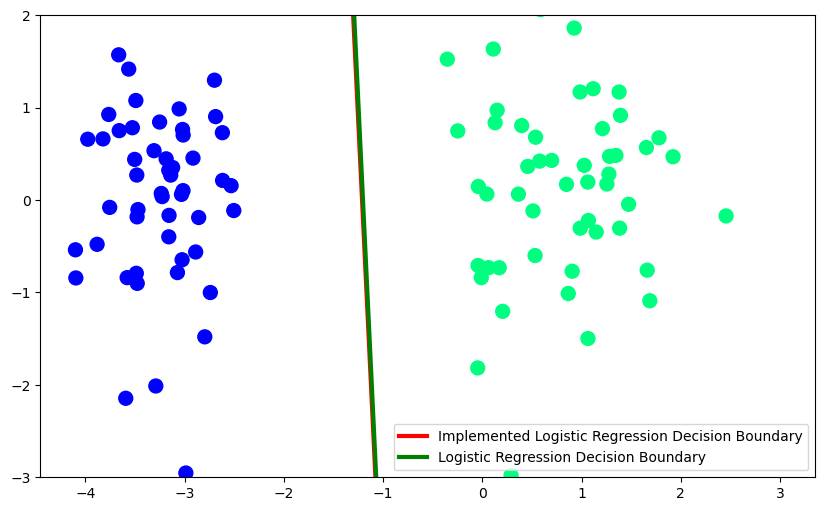

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag', penalty=None)
model.fit(X, y)
intercept_, coef_ = model.intercept_[0], model.coef_[0]
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input4 = np.linspace(-3, 3, 100)
y_input4 = m * x_input4 + b
plt.figure(figsize=(10, 6))
plt.plot(x_input3, y_input3, color='red', linewidth=3, label='Implemented Logistic Regression Decision Boundary')
plt.plot(x_input4, y_input4, color='green', linewidth=3, label='Logistic Regression Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.legend()